Text(0.5, 1.0, 'Large cities in the contiguous United States, 2010')

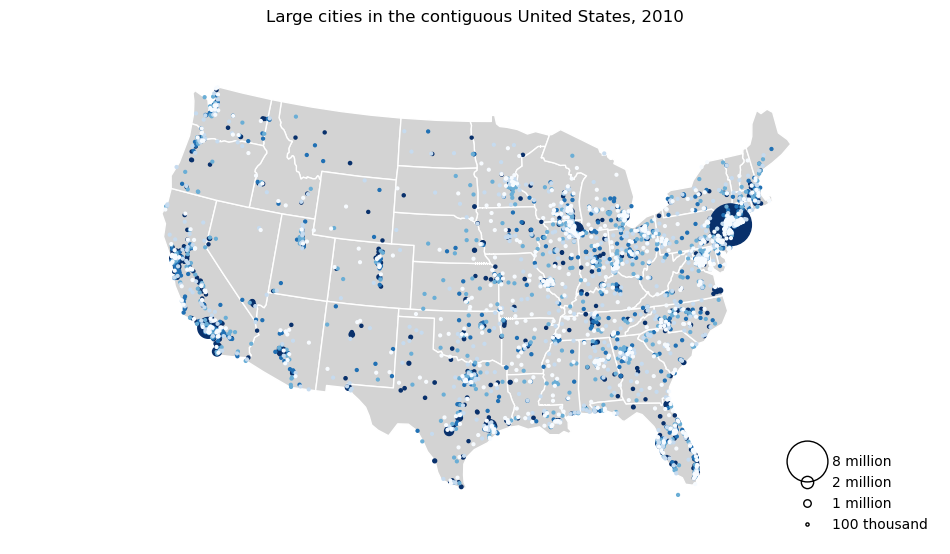

In [6]:
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np
import pandas as pd
from shapely.geometry import Point

continental_usa_cities = gpd.read_file(gplt.datasets.get_path('usa_cities'))
continental_usa_cities = continental_usa_cities.query('STATE not in ["AK", "HI", "PR"]')
contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))
scheme = mc.Quantiles(continental_usa_cities['POP_2010'], k=5)

ax = gplt.polyplot(
    contiguous_usa,
    zorder=-1,
    linewidth=1,
    projection=gcrs.AlbersEqualArea(),
    edgecolor='white',
    facecolor='lightgray',
    figsize=(12, 7)
)
gplt.pointplot(
    continental_usa_cities,
    scale='POP_2010',
    limits=(2, 30),
    hue='POP_2010',
    cmap='Blues',
    scheme=scheme,
    legend=True,
    legend_var='scale',
    legend_values=[8000000, 2000000, 1000000, 100000],
    legend_labels=['8 million', '2 million', '1 million', '100 thousand'],
    legend_kwargs={'frameon': False, 'loc': 'lower right'},
    ax=ax
)

plt.title("Large cities in the contiguous United States, 2010")

In [2]:
continental_usa_cities.head()

,id,POP_2010,ELEV_IN_FT,STATE,geometry
0,53,40888.0,1611.0,ND,POINT (-101.29627 48.23251)
1,101,52838.0,830.0,ND,POINT (-97.03285 47.92526)
2,153,15427.0,1407.0,ND,POINT (-98.70844 46.91054)
3,177,105549.0,902.0,ND,POINT (-96.78980 46.87719)
4,192,17787.0,2411.0,ND,POINT (-102.78962 46.87918)


In [4]:
continental_usa_cities.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 3616 entries, 0 to 3665
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   id          3616 non-null   object  
 1   POP_2010    3616 non-null   float64 
 2   ELEV_IN_FT  3616 non-null   float64 
 3   STATE       3616 non-null   object  
 4   geometry    3616 non-null   geometry
dtypes: float64(2), geometry(1), object(2)
memory usage: 169.5+ KB


In [10]:
# I created and cleaned a geopandas dataframe and wrote it to a CSV 
# us_radio.csv
file_name = 'us_radio.csv'
us_radio = pd.read_csv(file_name)

In [11]:
us_radio.head()

,Unnamed: 0,Callsign,Service,Channel,City,State,Country,Facility ID Number (unique to each station),N (North) or S (South) Latitude,Degrees Latitude,Minutes Latitude,Seconds Latitude,W (West) or (E) East Longitude,Degrees Longitude,Minutes Longitude,Seconds Longitude,Licensee or Permittee,long_decimal,lat_decimal
0,22,WKRE,FM,201,ARGO,AL,US,169863,N,33,41,43.3,W,86,31,2.9,TBTA MINISTRIES,-86.517472,33.695361
1,23,WSJL,FM,201,BESSEMER,AL,US,88660,N,33,23,45.4,W,87,1,7.0,"ELIJAH RADIO, INC.",-87.018611,33.395944
2,24,WAYH,FM,201,HARVEST,AL,US,61509,N,34,49,8.3,W,86,44,19.0,HOPE MEDIA GROUP,-86.738611,34.818972
3,25,KBAP,FM,201,BATESVILLE,AR,US,175536,N,35,47,52.2,W,91,40,16.5,TONY V. HAMMACK MINISTRIES,-91.671250,35.797833
4,26,KRQA,FM,201,BENTONVILLE,AR,US,77546,N,36,23,37.3,W,94,10,53.7,EDUCATIONAL MEDIA FOUNDATION,-94.181583,36.393694


In [12]:
us_radio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26296 entries, 0 to 26295
Data columns (total 19 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Unnamed: 0                                   26296 non-null  int64  
 1   Callsign                                     26296 non-null  object 
 2   Service                                      26296 non-null  object 
 3   Channel                                      26296 non-null  int64  
 4   City                                         26296 non-null  object 
 5   State                                        26296 non-null  object 
 6   Country                                      26296 non-null  object 
 7   Facility ID Number (unique to each station)  26296 non-null  int64  
 8   N (North) or S (South) Latitude              26296 non-null  object 
 9   Degrees Latitude                             26296 non-null  int64  
 10

In [14]:
us_radio = us_radio.drop(columns = ['Unnamed: 0'])


In [15]:
us_radio = us_radio.drop(columns = ['N (North) or S (South) Latitude','Degrees Latitude','Minutes Latitude',
                                    'Seconds Latitude','W (West) or (E) East Longitude','Degrees Longitude','Minutes Longitude',
                                   'Seconds Longitude'])

In [16]:
us_radio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26296 entries, 0 to 26295
Data columns (total 10 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Callsign                                     26296 non-null  object 
 1   Service                                      26296 non-null  object 
 2   Channel                                      26296 non-null  int64  
 3   City                                         26296 non-null  object 
 4   State                                        26296 non-null  object 
 5   Country                                      26296 non-null  object 
 6   Facility ID Number (unique to each station)  26296 non-null  int64  
 7   Licensee or Permittee                        26296 non-null  object 
 8   long_decimal                                 26296 non-null  float64
 9   lat_decimal                                  26296 non-null  float64
dty

In [19]:
us_radio['Callsign'].nunique()

21363

In [17]:
#Creating the geodataframe
gdf_liscense = gpd.GeoDataFrame(
    us_radio['Licensee or Permittee'], geometry = gpd.points_from_xy(us_radio['long_decimal'], us_radio['lat_decimal'], crs="EPSG:4326"))

In [18]:
#Creating the geodataframe
gdf_call = gpd.GeoDataFrame(
    us_radio['Callsign'], geometry = gpd.points_from_xy(us_radio['long_decimal'], us_radio['lat_decimal'], crs="EPSG:4326"))

In [95]:
gdf_all = gpd.GeoDataFrame(
    us_radio[['Licensee or Permittee','Callsign','Channel']], geometry = gpd.points_from_xy(us_radio['long_decimal'], us_radio['lat_decimal'], crs="EPSG:4326"))

In [96]:
gdf_all.head()

,Licensee or Permittee,Callsign,Channel,geometry
0,TBTA MINISTRIES,WKRE,201,POINT (-86.51747 33.69536)
1,"ELIJAH RADIO, INC.",WSJL,201,POINT (-87.01861 33.39594)
2,HOPE MEDIA GROUP,WAYH,201,POINT (-86.73861 34.81897)
3,TONY V. HAMMACK MINISTRIES,KBAP,201,POINT (-91.67125 35.79783)
4,EDUCATIONAL MEDIA FOUNDATION,KRQA,201,POINT (-94.18158 36.39369)


In [21]:
#gdf_liscense.explore()

In [22]:
continental_usa_cities.head()

,id,POP_2010,ELEV_IN_FT,STATE,geometry
0,53,40888.0,1611.0,ND,POINT (-101.29627 48.23251)
1,101,52838.0,830.0,ND,POINT (-97.03285 47.92526)
2,153,15427.0,1407.0,ND,POINT (-98.70844 46.91054)
3,177,105549.0,902.0,ND,POINT (-96.78980 46.87719)
4,192,17787.0,2411.0,ND,POINT (-102.78962 46.87918)


In [65]:
continental_usa_cities['POP_2010'].describe()

count    3.616000e+03
mean     5.150940e+04
std      1.926650e+05
min      1.000800e+04
25%      1.421275e+04
50%      2.230850e+04
75%      4.252050e+04
max      8.175133e+06
Name: POP_2010, dtype: float64

## cities rang in pop. from 10,000 to 8,000,000

In [23]:
gdf_liscense.head()

,Licensee or Permittee,geometry
0,TBTA MINISTRIES,POINT (-86.51747 33.69536)
1,"ELIJAH RADIO, INC.",POINT (-87.01861 33.39594)
2,HOPE MEDIA GROUP,POINT (-86.73861 34.81897)
3,TONY V. HAMMACK MINISTRIES,POINT (-91.67125 35.79783)
4,EDUCATIONAL MEDIA FOUNDATION,POINT (-94.18158 36.39369)


In [58]:
import mapclassify as mc

## break point - KDEpLOT works

C:\Users\seanh\anaconda3\envs\geo_env\lib\site-packages\geoplot\geoplot.py:248: UserWarning: Please specify "legend_var" explicitly when both "hue" and "scale" are specified. Defaulting to "legend_var='hue'".
  warnings.warn(


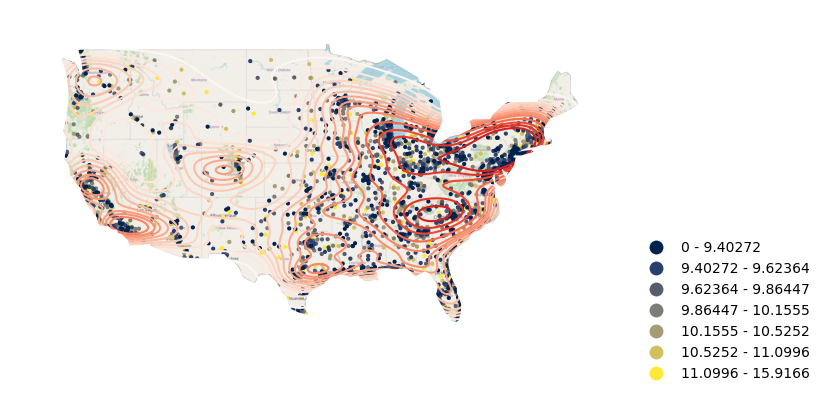

In [89]:
#fig , ax = plt.subplots(figsize=(15,15))
#contiguous_usa.plot(ax=ax,alpha = .2, color = 'grey')
#gdf_liscense.plot(ax=ax,markersize=1,color='red')

ax = gplt.kdeplot(
    gdf_liscense,
    fill=False,
    clip=contiguous_usa,
    cmap='Reds',
    n_levels=15,
    projection=gcrs.WebMercator()
)
"""
gplt.polyplot(
    contiguous_usa,
    projection=gcrs.AlbersEqualArea(),
    zorder=1,
    ax=ax
)"""
#
scheme = mc.Quantiles(np.log(continental_usa_cities['POP_2010']), k=7)
gplt.pointplot(continental_usa_cities,cmap='cividis',scale='POP_2010', limits=(2, 5),
               hue=np.log(continental_usa_cities['POP_2010']),
               scheme=scheme,legend=True, legend_kwargs={'bbox_to_anchor': (1, 0.35), 'frameon': False},
               ax=ax)
gplt.webmap(contiguous_usa,ax=ax)



In [149]:
#first find distance between two gps locations and determine the units of measurement
samplecity =continental_usa_cities.sample(1)
samplestations = gdf_all.sample(1)
samplecity=samplecity.to_crs(epsg=32662)
samplestations=samplestations.to_crs(epsg=32662)
#this projection will calc distance in meters

In [150]:
continental_usa_cities.crs==gdf_all.crs

True

In [151]:
samplestations['geometry']
#index value of distance

24968    POINT (-13811978.189 4893060.587)
Name: geometry, dtype: geometry

In [152]:
distances = samplecity['geometry'].distance(samplestations['geometry'],align=False)

In [153]:
samplecity.head()

,id,POP_2010,ELEV_IN_FT,STATE,geometry
3056,20407,23261.0,1165.0,CA,POINT (-13053451.808 3790244.695)


In [170]:
d= distances.values[0]
#index value of distance
#i can return just the number
type(d)

numpy.float64

In [157]:
continental_usa_cities.iloc[[3056]]
#can find the city in the original

,id,POP_2010,ELEV_IN_FT,STATE,geometry
3056,20407,23261.0,1165.0,CA,POINT (-117.26115 34.04835)


In [155]:
#distance
samplestations


,Licensee or Permittee,Callsign,Channel,geometry
24968,"COAST BROADCASTING CO., INC.",KCST-FM,295,POINT (-13811978.189 4893060.587)


In [226]:
type(gdf_all.iloc[[24968]])

geopandas.geodataframe.GeoDataFrame

## distance works with meters. must convert to miles and build function

In [173]:
gdf_all['Channel'].nunique()

100

In [174]:
gdf_all['Channel'].max()

300

In [175]:
gdf_all['Channel'].min()

201

In [176]:
all_channels=list(range(201,301))
#list of each channel possible 


In [178]:
#all_channels

In [194]:
city_stations=[{}]


In [195]:
city_stations[0]['201']=[]

In [196]:
city_stations[0]['201'].append(gdf_all.iloc[[24968]])

In [198]:
city_stations[0]['201'].append(gdf_all.iloc[[15000]])

In [207]:
city_stations[0]['201'][0]

,Licensee or Permittee,Callsign,Channel,geometry
24968,"COAST BROADCASTING CO., INC.",KCST-FM,295,POINT (-124.07511 43.95511)


### before making the functions I need to make sure my data ready

In [221]:
gdf_all.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 26296 entries, 0 to 26295
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Licensee or Permittee  26296 non-null  object  
 1   Callsign               26296 non-null  object  
 2   Channel                26296 non-null  int64   
 3   geometry               26296 non-null  geometry
dtypes: geometry(1), int64(1), object(2)
memory usage: 821.9+ KB


In [217]:
continental_usa_cities.reset_index(drop=True, inplace=True)

In [231]:
continental_usa_cities.iloc[0]

id                                                        53
POP_2010                                             40888.0
ELEV_IN_FT                                            1611.0
STATE                                                     ND
geometry      POINT (-101.29627319999997 48.232509500000106)
Name: 0, dtype: object

In [240]:
gdf_all.iloc[[20000]]

,Licensee or Permittee,Callsign,Channel,geometry
20000,"BROKEN ARROW CATHOLIC RADIO, INC.",KPIM-LP,275,POINT (-95.88331 36.03564)


In [1]:
#gdf_all.explore()

In [329]:
#when ran cities will be continental_usa_cities, i is the index value, stations is the gdf of stations
#returns a distance in meters to a specific radio station from city center
continental_usa_cities['geometry']=continental_usa_cities['geometry'].to_crs(epsg=32662)
gdf_all['geometry']=gdf_all['geometry'].to_crs(epsg=32662)
def distance_calc(city,station):
    x= city
    y=station
    distance = x['geometry'].distance(y['geometry'],align=False)
    d= distance.values[0]
    return d

In [330]:
# 64373.8 m is 40 miles
x = distance_calc(continental_usa_cities.iloc[[0]],gdf_all.iloc[[20000]])
x/64373.8

20.424770485218318

In [331]:
cities_complete = pd.DataFrame(columns=['city_id','Channel','Licensee or Permittee',
                                        'Callsign','distance_to_tower','POP_2010','state'])
def channel_choice(city,stations,df):
    city_stations=[]
    j=0
    while j <len(city):
        y = city.iloc[[j]]
        i=0
        while i <len(stations):
            x = stations.iloc[[i]]
            d= distance_calc(y,x)
            if d /64373.8 <=1:
                df = df.append({"city_id" : y['id'].values[0],"Channel":x['Channel'].values[0],
                                    "Licensee or Permittee":x['Licensee or Permittee'].values[0],"Callsign":x['Callsign'].values[0],
                                    "distance_to_tower":d,
                                    "POP_2010":y['POP_2010'].values[0], "state":y['STATE'].values[0] },ignore_index=True)
            i+=1
        j+=1
    return df  

In [263]:
import warnings
warnings.filterwarnings('ignore')

In [306]:
continental_usa_cities

,id,POP_2010,ELEV_IN_FT,STATE,geometry
0,53,40888.0,1611.0,ND,POINT (-101.29627 48.23251)
1,101,52838.0,830.0,ND,POINT (-97.03285 47.92526)
2,153,15427.0,1407.0,ND,POINT (-98.70844 46.91054)
3,177,105549.0,902.0,ND,POINT (-96.78980 46.87719)
4,192,17787.0,2411.0,ND,POINT (-102.78962 46.87918)
...,...,...,...,...,...
3611,38128,2565635.0,49.0,NY,POINT (-73.94956 40.65009)
3612,38129,2272771.0,39.0,NY,POINT (-73.79745 40.75016)
3613,38130,470728.0,164.0,NY,POINT (-74.14981 40.58328)
3614,38138,28712.0,187.0,MA,POINT (-71.33303 41.98405)


In [276]:
gdf_all.iloc[[0]]['Callsign'].values[0]

'WKRE'

In [334]:
#only 10 cities for time sake - this calculation takes a long time! 23 minutes for 10...
#2 minutes for 10
cities_complete = channel_choice(continental_usa_cities,gdf_all,cities_complete)

In [339]:

cities_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303603 entries, 0 to 303602
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   city_id                303603 non-null  object 
 1   Channel                303603 non-null  object 
 2   Licensee or Permittee  303603 non-null  object 
 3   Callsign               303603 non-null  object 
 4   distance_to_tower      303603 non-null  float64
 5   POP_2010               303603 non-null  float64
 6   state                  303603 non-null  object 
dtypes: float64(2), object(5)
memory usage: 16.2+ MB


In [337]:
cities_complete.city_id.nunique()

3616

In [338]:
cities_complete.to_csv('FM_landscape_1.csv')

In [340]:
cities_complete[cities_complete['city_id']=='3673']['Licensee or Permittee'].value_counts()

IHM LICENSES, LLC                                                     16
AUDACY LICENSE, LLC                                                   14
NEW YORK PUBLIC RADIO                                                  8
BEASLEY MEDIA GROUP LICENSES, LLC                                      6
PRESS COMMUNICATIONS, L.L.C.                                           6
UNIVISION RADIO STATIONS GROUP, INC.                                   5
EMMIS NEW YORK RADIO LICENSE LLC                                       5
BRIDGELIGHT, LLC                                                       5
TOWNSQUARE LICENSE, LLC                                                5
MEDIACO WQHT LICENSE LLC                                               4
WSKQ LICENSING, INC.                                                   3
RAHUL WALIA                                                            3
BEST MEDIA, INC.                                                       3
EDUCATIONAL MEDIA FOUNDATION                       

In [325]:
cities_complete=cities_complete.drop_duplicates()

In [326]:
cities_complete

,city_id,Channel,Licensee or Permittee,Callsign,distance_to_tower,POP_2010,state
0,7449,201,DOUBLE HELIX CORPORATION,KDHX,42719.729325,10860.0,MO
1,7449,201,DOUBLE HELIX CORPORATION,KDHX,42717.123851,10860.0,MO
2,7449,204,"BOARD OF TRUSTEES, SOUTHERN ILLINOIS UNIVERSITY",WSIE,27209.559986,10860.0,MO
3,7449,204,"BOARD OF TRUSTEES, SOUTHERN ILLINOIS UNIVERSITY",WSIE,27187.714082,10860.0,MO
4,7449,206,LINDENWOOD UNIVERSITY,KCLC,31751.485783,10860.0,MO
...,...,...,...,...,...,...,...
792,2163,290,CITY OF STEVENS POINT,WSNP-LP,48884.805822,39106.0,WI
793,2163,291,RESULTS BROADCASTING INC.,WACD,55625.472198,39106.0,WI
794,2163,293,"NRG LICENSE SUB, LLC",WYTE,42983.675141,39106.0,WI
795,2163,296,"ABOVE AND BEYOND BROADCASTING, INC.",WLBI-LP,57608.398818,39106.0,WI


In [341]:
cities_complete['Channel'].nunique()

100

In [342]:
cities_complete['Channel'].value_counts()

201    5569
268    5250
256    5014
300    4818
284    4311
       ... 
255    1792
257    1792
299    1696
265    1413
263    1282
Name: Channel, Length: 100, dtype: int64

In [281]:
gdf_all.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 26296 entries, 0 to 26295
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Licensee or Permittee  26296 non-null  object  
 1   Callsign               26296 non-null  object  
 2   Channel                26296 non-null  int64   
 3   geometry               26296 non-null  geometry
dtypes: geometry(1), int64(1), object(2)
memory usage: 821.9+ KB


In [282]:
gdf_all.nunique()

Licensee or Permittee     7627
Callsign                 21363
Channel                    100
geometry                 18784
dtype: int64

In [283]:
gdf_all = gdf_all.drop_duplicates()

In [284]:
gdf_all.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 24917 entries, 0 to 26295
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Licensee or Permittee  24917 non-null  object  
 1   Callsign               24917 non-null  object  
 2   Channel                24917 non-null  int64   
 3   geometry               24917 non-null  geometry
dtypes: geometry(1), int64(1), object(2)
memory usage: 973.3+ KB


In [290]:
from shapely.geometry import Point

NameError: name 'geometry' is not defined

In [293]:
gdf_all['geometry'].value_counts()

POINT (-73.98625 40.75622)    18
POINT (-87.62311 41.89892)    17
POINT (-81.56397 30.27636)    16
POINT (-73.98583 40.74833)    16
POINT (-93.27244 44.97608)    16
                              ..
POINT (-96.38725 42.17469)     1
POINT (-91.98017 40.99392)     1
POINT (-90.64736 42.58528)     1
POINT (-92.16375 43.42967)     1
POINT (-78.97333 39.52294)     1
Name: geometry, Length: 18784, dtype: int64